In [9]:
!pip3 install umap-learn

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 6.7 MB/s eta 0:00:00a 0:00:01
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.2/26.2 MB 349.4 kB/s eta 0:00:0000:0100:03

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load dataset
df = pd.read_csv("insurance.csv", sep='\t')

# Handle missing values
numerical_features = ['age', 'bmi', 'children', 'charges']
categorical_features = ['sex', 'smoker', 'region']
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].mean())
df[categorical_features] = df[categorical_features].fillna(df[categorical_features].mode().iloc[0])

# Preprocessing: Standardize numerical & one-hot encode categorical
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical_features),
    ('num', StandardScaler(), numerical_features)
])

# Apply transformations
X_processed = preprocessor.fit_transform(df)

# Get transformed feature names
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = list(cat_features) + numerical_features

# Create processed DataFrame
X_df = pd.DataFrame(
    X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed,
    columns=feature_names
)

In [13]:
from sklearn.cluster import KMeans, DBSCAN

# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_df)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_df)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


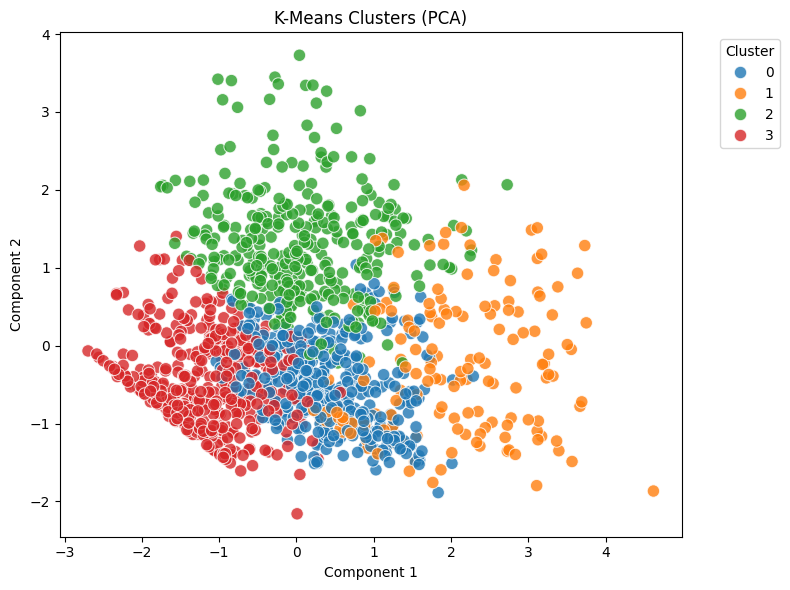

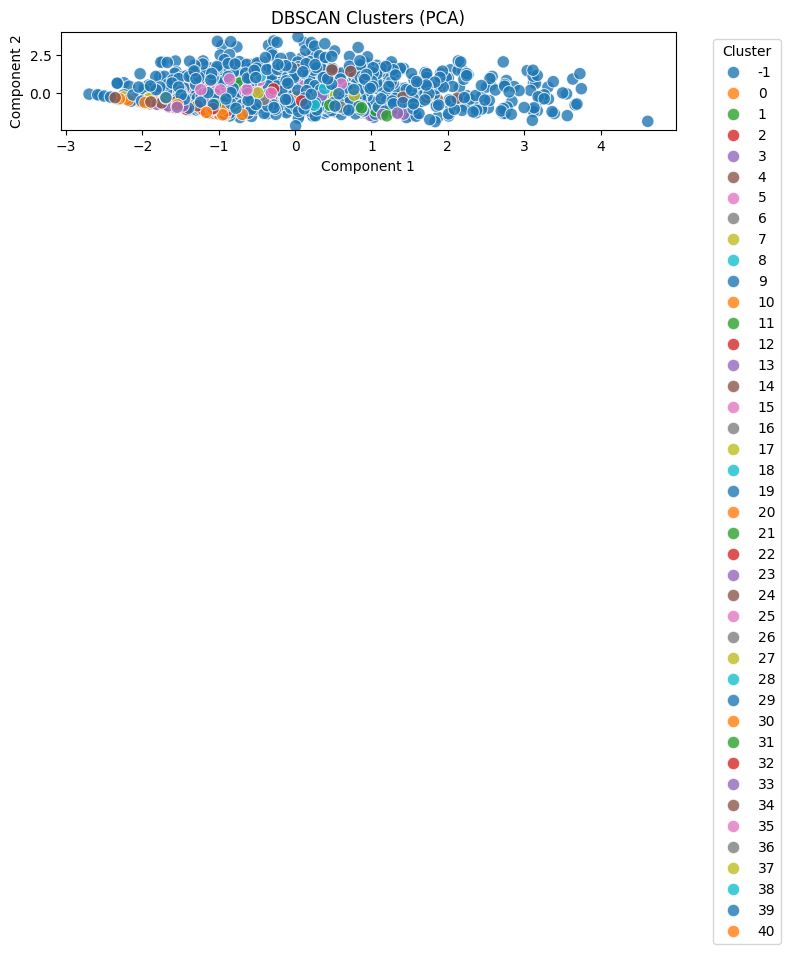

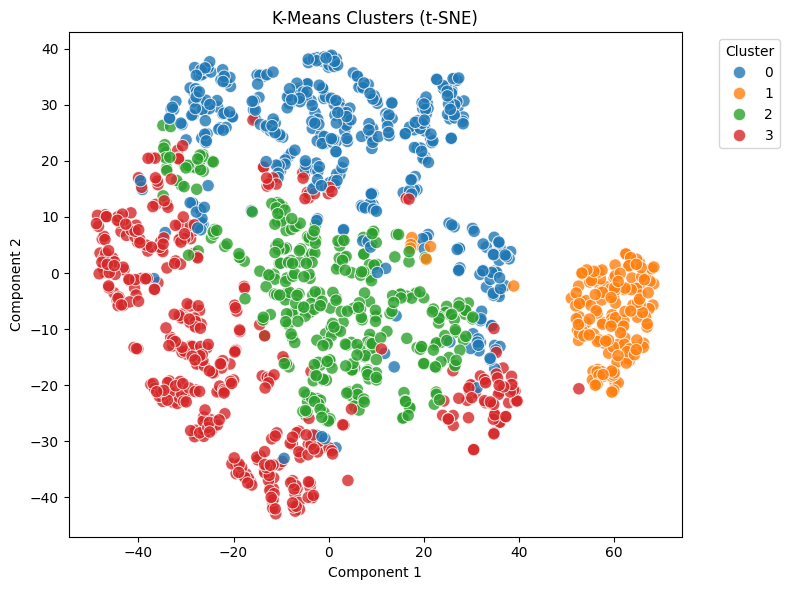

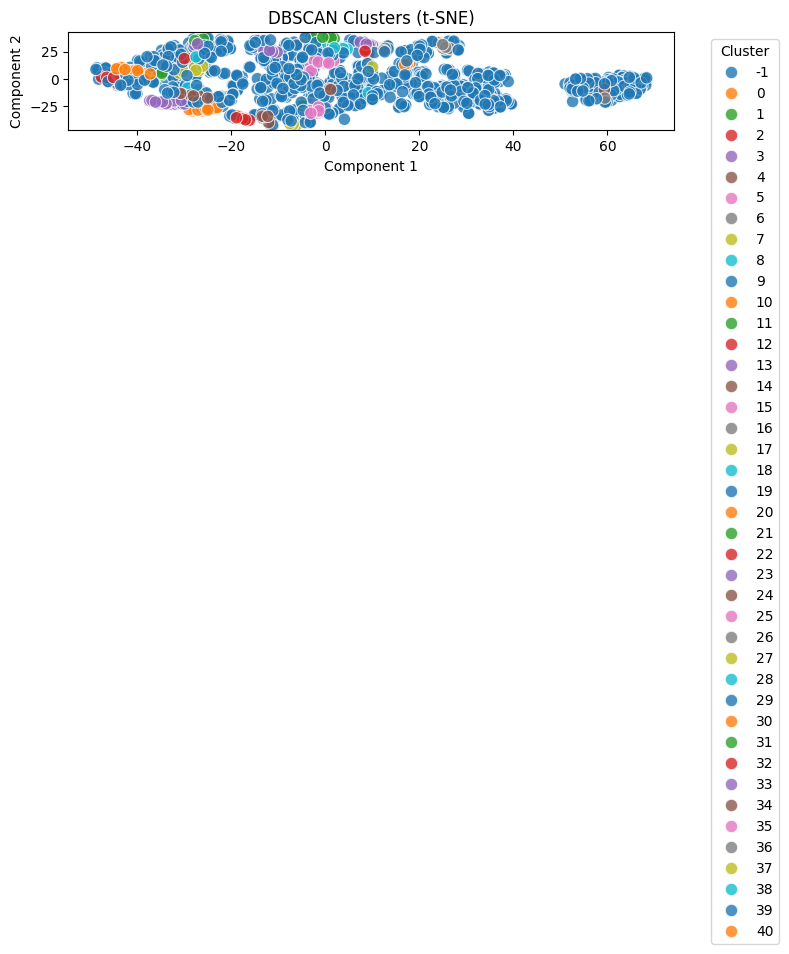

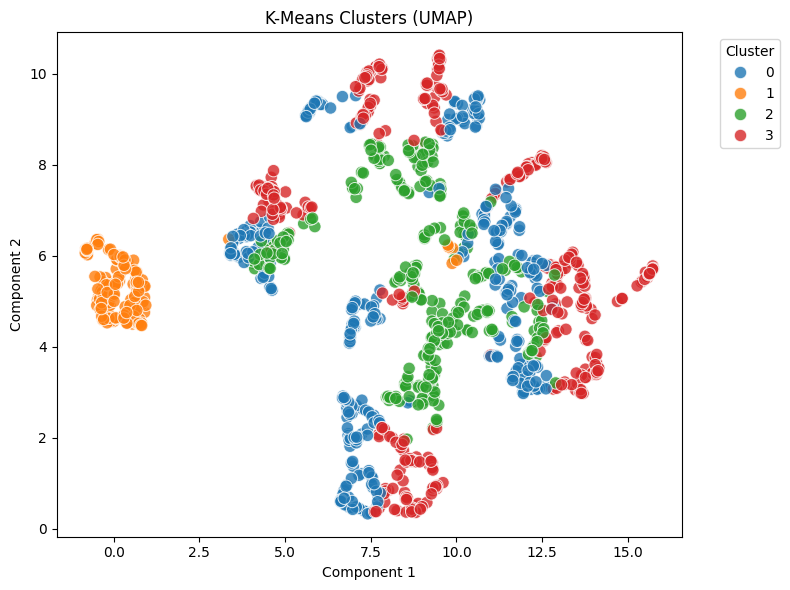

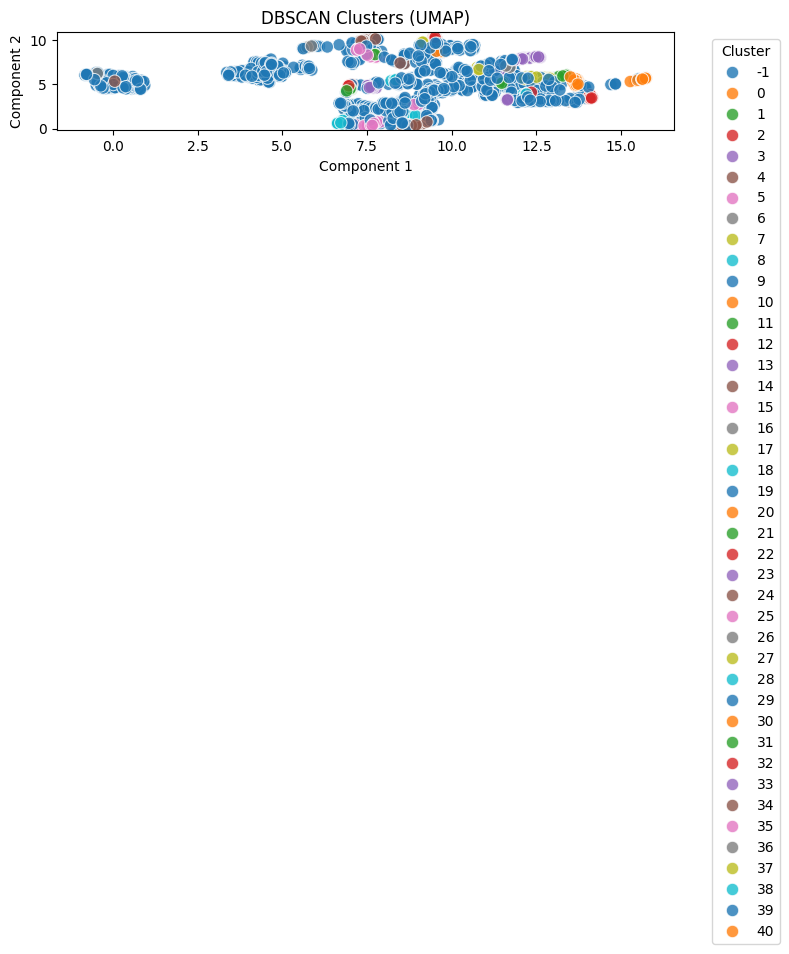

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_df)

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_df)

# UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_df)

# Plotting Function
def plot_clusters(X_2d, labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=labels, palette='tab10', s=80, alpha=0.8)
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Visualize All Methods and Labels
plot_clusters(X_pca, kmeans_labels, "K-Means Clusters (PCA)")
plot_clusters(X_pca, dbscan_labels, "DBSCAN Clusters (PCA)")
plot_clusters(X_tsne, kmeans_labels, "K-Means Clusters (t-SNE)")
plot_clusters(X_tsne, dbscan_labels, "DBSCAN Clusters (t-SNE)")
plot_clusters(X_umap, kmeans_labels, "K-Means Clusters (UMAP)")
plot_clusters(X_umap, dbscan_labels, "DBSCAN Clusters (UMAP)")
